In [1]:
import pandas as pd
df = pd.read_csv('data_final.csv')
df.head()

publisher game_names            video_type   video_link  \
0    Capcom  Exoprimal               Trailer  _WOowJ-Od8g   
1    Capcom  Exoprimal  Announcement Trailer  F3K89Vlz-80   
2    Capcom  Exoprimal        Gameplay Video  y0C6jGyzIZs   
3    Capcom  Exoprimal               Trailer  UD003Da8gmY   
4    Capcom  Exoprimal  Release Date Trailer  xLyNU4TlY8A   

                                     video_url game_release_date  \
0  https://www.youtube.com/watch?v=_WOowJ-Od8g        2023-07-14   
1  https://www.youtube.com/watch?v=F3K89Vlz-80        2023-07-14   
2  https://www.youtube.com/watch?v=y0C6jGyzIZs        2023-07-14   
3  https://www.youtube.com/watch?v=UD003Da8gmY        2023-07-14   
4  https://www.youtube.com/watch?v=xLyNU4TlY8A        2023-07-14   

  youtube_uploaded_date  days_before_launch  viewCount  likeCount  ...  \
0   2022-06-13 22:25:05              -396.0     109924       1841  ...   
1   2022-03-09 22:04:14              -492.0     245616       4526  ...   
2   2022-06-15 20:52:07              -394.0      80935       1354  ...   
3   2022-09-15 09:43:32              -302.0      19937        697  ...   
4   2023-03-09 22:46:43              -127.0      34325        847  ...   

   Day -1  Day 0  Day 1  Day 2  Day 3  Day 4  Day 5  Day 6  Day 7  \
0       0    100     75     20     24    9.0   12.0   20.0   15.0   
1       0     44    100     41     21   16.0    9.0    8.0    8.0   
2      75     20     24      9     12   20.0   15.0   11.0   11.0   
3       0    100     39      0      0    0.0    0.0    0.0    0.0   
4       0     31     85     28     23   23.0   31.0   59.0  100.0   

        video_group  
0     Basic Trailer  
1     Basic Trailer  
2  Gameplay Content  
3     Basic Trailer  
4             Other  

[5 rows x 29 columns]

In [2]:
df.columns

Index(['publisher', 'game_names', 'video_type', 'video_link', 'video_url',
       'game_release_date', 'youtube_uploaded_date', 'days_before_launch',
       'viewCount', 'likeCount', 'commentCount', 'subscriberCount',
       'duration_min', 'Day -7', 'Day -6', 'Day -5', 'Day -4', 'Day -3',
       'Day -2', 'Day -1', 'Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4',
       'Day 5', 'Day 6', 'Day 7', 'video_group'],
      dtype='object')

In [3]:
df.shape

(244, 29)

In [4]:
df['game_release_date']     = pd.to_datetime(df['game_release_date'])
df['youtube_uploaded_date'] = pd.to_datetime(df['youtube_uploaded_date'])
df['video_group']           = df['video_group'].astype('category')

In [5]:
# Cell 2: preSum, postSum, delta 변수 생성
pre_cols  = [f'Day {i}' for i in range(-7, 0)]
post_cols = [f'Day {i}' for i in range(0, 8)]
df['preSum']  = df[pre_cols].sum(axis=1)
df['postSum'] = df[post_cols].sum(axis=1)
df['delta']   = df['postSum'] - df['preSum']

In [6]:
# Cell 7: 검색량 증가율(rate) 생성
import numpy as np

# preSum이 0인 경우 np.nan 처리 후 계산
df['rate'] = df['delta'] / df['preSum'].replace({0: np.nan})

In [15]:
df[df['preSum'] == 0]

publisher                             game_names  \
1                   Capcom                              Exoprimal   
10                  Capcom                 Resident Evil Re:Verse   
11                  Capcom            Dead Rising Deluxe Remaster   
13                  Capcom              Capcom Arcade 2nd Stadium   
25                  Capcom    Resident Evil Village: Gold Edition   
..                     ...                                    ...   
227  Ubisoft Entertainment                Just Dance 2025 Edition   
228  Ubisoft Entertainment           Star Wars Outlaws: Wild Card   
229  Ubisoft Entertainment  Star Wars Outlaws: A Pirate's Fortune   
234  Ubisoft Entertainment         Anno 1800: Empire of the Skies   
235  Ubisoft Entertainment       Prince of Persia: The Lost Crown   

               video_type   video_link  \
1    Announcement Trailer  F3K89Vlz-80   
10         Launch Trailer  raCeTkW4Ts0   
11                 Teaser  xyZ7gagpgsU   
13   Announcement Trailer  jSLCPk50iyQ   
25   Announcement Trailer  IJDIenuQepo   
..                    ...          ...   
227  Announcement Trailer  YjxAA1Jpwc0   
228        Launch Trailer  oc7FhNxCk8c   
229               Trailer  c27kWaF7umo   
234               Trailer  pXmpuUgiSYk   
235      Gameplay Trailer  MmX7a_e65uU   

                                       video_url game_release_date  \
1    https://www.youtube.com/watch?v=F3K89Vlz-80        2023-07-14   
10   https://www.youtube.com/watch?v=raCeTkW4Ts0        2022-10-28   
11   https://www.youtube.com/watch?v=xyZ7gagpgsU        2024-09-19   
13   https://www.youtube.com/watch?v=jSLCPk50iyQ        2022-07-22   
25   https://www.youtube.com/watch?v=IJDIenuQepo        2022-10-28   
..                                           ...               ...   
227  https://www.youtube.com/watch?v=YjxAA1Jpwc0        2024-10-15   
228  https://www.youtube.com/watch?v=oc7FhNxCk8c        2024-11-21   
229  https://www.youtube.com/watch?v=c27kWaF7umo        2025-05-15   
234  https://www.youtube.com/watch?v=pXmpuUgiSYk        2022-09-20   
235  https://www.youtube.com/watch?v=MmX7a_e65uU        2024-01-18   

    youtube_uploaded_date  days_before_launch  viewCount  likeCount  ...  \
1     2022-03-09 22:04:14              -492.0     245616       4526  ...   
10    2022-10-20 22:26:33                -8.0     129791       3789  ...   
11    2024-06-26 15:00:05               -85.0     103322       3180  ...   
13    2022-06-09 19:30:29               -43.0      97909       1709  ...   
25    2022-06-13 22:28:17              -137.0     326151      12411  ...   
..                    ...                 ...        ...        ...  ...   
227   2024-06-18 14:43:31              -119.0     133813       2603  ...   
228   2024-11-19 18:24:02                -2.0       2463         31  ...   
229   2025-04-18 04:00:45               -27.0      57203       2146  ...   
234   2022-09-20 13:00:35                 0.0      55581       1054  ...   
235   2023-06-08 19:09:42              -224.0    1667859      17618  ...   

     Day 3  Day 4  Day 5  Day 6  Day 7       video_group  preSum  postSum  \
1       21   16.0    9.0    8.0    8.0     Basic Trailer       0    247.0   
10      36  100.0   64.0    0.0   35.0             Other       0    327.0   
11      15   12.0   36.0  100.0   57.0             Other       0    329.0   
13       0    0.0    0.0    0.0    0.0     Basic Trailer       0    155.0   
25       0   25.0    0.0    0.0    0.0     Basic Trailer       0    184.0   
..     ...    ...    ...    ...    ...               ...     ...      ...   
227      0    0.0    0.0    0.0    0.0     Basic Trailer       0    100.0   
228     69   71.0   47.0    0.0    0.0             Other       0    287.0   
229      0    0.0    0.0    0.0    0.0     Basic Trailer       0    100.0   
234      0    0.0    0.0    0.0    0.0     Basic Trailer       0    173.0   
235     24   51.0   56.0   26.0   16.0  Gameplay Content       0    363.0   

    

In [7]:
# Cell 8: rate 기초 통계량 확인
print("=== rate (delta/preSum) Descriptive Statistics ===")
print(df['rate'].describe())

=== rate (delta/preSum) Descriptive Statistics ===
count    174.000000
mean       8.448592
std       28.976611
min       -1.000000
25%        0.297298
50%        1.783088
75%        4.714736
max      254.000000
Name: rate, dtype: float64


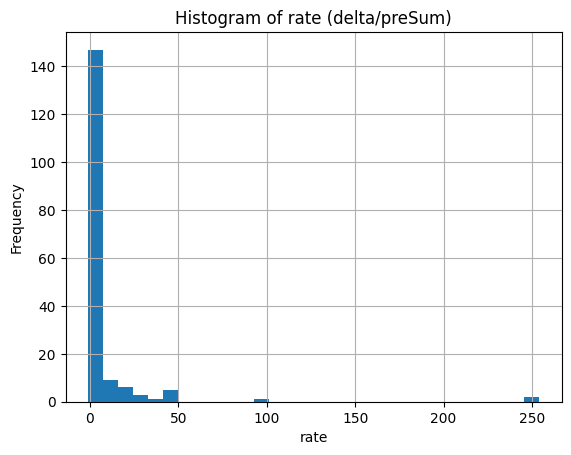

In [8]:
# Cell 9: rate 분포 히스토그램
import matplotlib.pyplot as plt

plt.figure()
df['rate'].dropna().hist(bins=30)
plt.title('Histogram of rate (delta/preSum)')
plt.xlabel('rate')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Cell 10: rate >= 100인 영상 필터링
high_rate_videos = df[df['rate'] >= 70][[ 'game_names', 'video_group', 'rate']]

# Cell 11: 결과 출력
print("=== rate >= 70인 영상 목록 ===")
print(high_rate_videos.to_string(index=False)) 

=== rate >= 70인 영상 목록 ===
                    game_names   video_group  rate
                     Exoprimal         Other  94.0
Resident Evil 4: Separate Ways Basic Trailer 254.0
Resident Evil 4: Separate Ways Basic Trailer 254.0


rate가 100 이상인 영상은 두 개로,

Capcom사의 Resident Evil 4: Separate Ways (Basic Trailer) rate=254
입니다.
(분모 preSum이 작아 증가율이 매우 크게 나온 케이스예요.)

In [10]:
# Cell 14: outlier(rate >= 100) 제거
df_sliced = df[df['rate'] < 70]

# Cell 15: 남은 데이터 개수 확인
print("=== outlier 제거 후 관측치 수 ===")
print(len(df_sliced))

# Cell 16: 주요 컬럼 확인 (상위 10개)
print("\n=== outlier 제거 후 상위 10개 관측치 ===")
print(df_sliced[['publisher','game_names','video_group','rate']].head(10).to_string(index=False))

=== outlier 제거 후 관측치 수 ===
171

=== outlier 제거 후 상위 10개 관측치 ===
publisher                    game_names       video_group      rate
   Capcom                     Exoprimal     Basic Trailer 33.375000
   Capcom                     Exoprimal  Gameplay Content -0.302857
   Capcom                     Exoprimal     Basic Trailer  6.315789
   Capcom                     Exoprimal     Basic Trailer  3.495413
   Capcom                     Exoprimal Developer Content  2.795775
   Capcom Monster Hunter Rise: Sunbreak     Basic Trailer  3.417582
   Capcom Monster Hunter Rise: Sunbreak             Other  3.014493
   Capcom Monster Hunter Rise: Sunbreak     Basic Trailer  4.420455
   Capcom   Dead Rising Deluxe Remaster             Other  1.058824
   Capcom              Street Fighter 6     Basic Trailer 28.636364


In [16]:
df_sliced['rate'].describe()

count    171.000000
mean       5.076345
std        9.518946
min       -1.000000
25%        0.293513
50%        1.716867
75%        4.451613
max       49.363636
Name: rate, dtype: float64

In [19]:
# Cell 22: days_to_launch 변수 생성 (양수로 변환)
df_processed = df[df['rate'] < 70].copy()
df_processed['days_to_launch'] = -df_processed['days_before_launch']

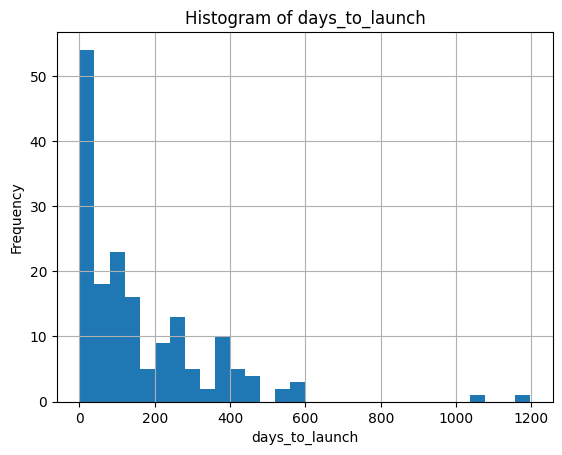

In [20]:
# Cell 23: days_to_launch 분포 - 히스토그램
plt.figure()
df_processed['days_to_launch'].hist(bins=30)
plt.title('Histogram of days_to_launch')
plt.xlabel('days_to_launch')
plt.ylabel('Frequency')
plt.show()

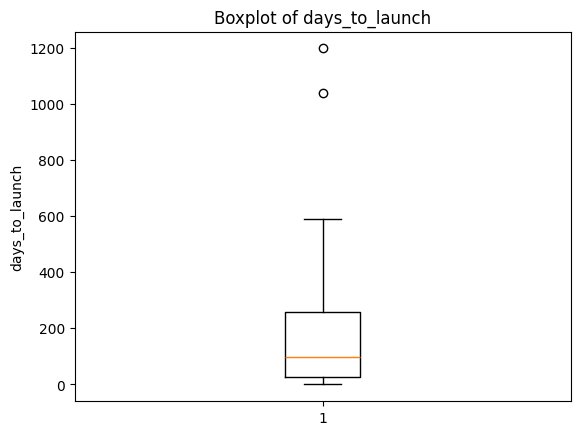

In [21]:
# Cell 24: days_to_launch 분포 - 박스플롯
plt.figure()
plt.boxplot(df_processed['days_to_launch'].dropna())
plt.title('Boxplot of days_to_launch')
plt.ylabel('days_to_launch')
plt.show()

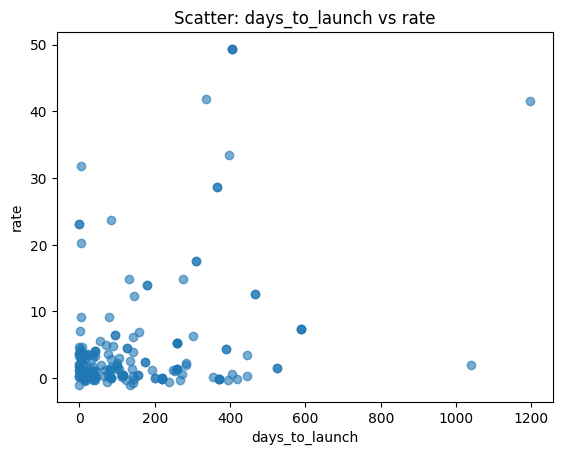

In [22]:
# Cell 25: 산점도 - days_to_launch vs rate
plt.figure()
plt.scatter(df_processed['days_to_launch'], df_processed['rate'], alpha=0.6)
plt.title('Scatter: days_to_launch vs rate')
plt.xlabel('days_to_launch')
plt.ylabel('rate')
plt.show()

In [23]:
# Cell 26: 상관계수 출력 (days_to_launch vs rate)
corr_new = df_processed[['days_to_launch', 'rate']].corr().iloc[0,1]
print(f"Correlation between days_to_launch and rate: {corr_new:.3f}")

Correlation between days_to_launch and rate: 0.344


95번째 백분위수(≈32.36) 기준으로 rate가 극단적으로 높은(상위 5%) 관측치를 제거했습니다.

로그 변환(log1p(rate)) 후, rate = -1 등으로 인해 생긴 비유한(무한대) 값을 제외하여 총 163개의 관측치가 남았습니다.

왼쪽 그래프에서 원본 rate가 여전히 우측 꼬리가 있는 분포를 보이는 반면, 오른쪽의 log1p(rate)는 왜곡이 크게 완화된 것을 확인할 수 있습니다.

이제 이 df_filtered를 회귀 모델에 사용할 변수 세트(예: log_rate, days_to_launch, 기타 메타데이터)로 삼는 것이 적합해 보입니다. 추가로 더 필요한 준비 단계가 있으면 알려줘! 

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Cell 1: 95th percentile 기준 계산 및 필터링
threshold_95 = df['rate'].quantile(0.95)
df_filtered = df[df['rate'] <= threshold_95].copy()
print(f"95th percentile of rate: {threshold_95:.2f}")
print(f"Filtered count: {len(df_filtered)} / {len(df)}")

95th percentile of rate: 32.36
Filtered count: 165 / 244


In [26]:
# Cell 2: 로그 변환 및 유한값만 남기기
df_filtered['log_rate'] = np.log1p(df_filtered['rate'])
df_filtered = df_filtered[np.isfinite(df_filtered['log_rate'])]
print(f"After dropping non-finite log_rate: {len(df_filtered)} rows")

After dropping non-finite log_rate: 163 rows


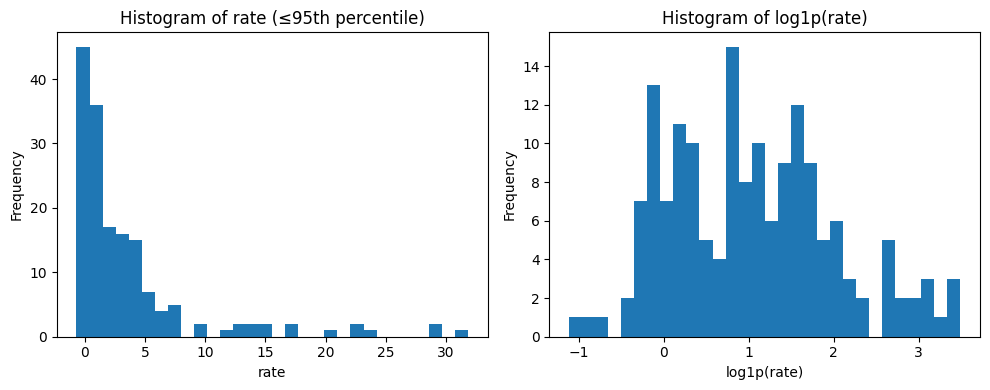

In [27]:
# Cell 3: rate vs log_rate 히스토그램 비교
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].hist(df_filtered['rate'], bins=30)
axes[0].set_title('Histogram of rate (≤95th percentile)')
axes[0].set_xlabel('rate')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_filtered['log_rate'], bins=30)
axes[1].set_title('Histogram of log1p(rate)')
axes[1].set_xlabel('log1p(rate)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

days_to_launch에 대해서도 95th percentile 이상(상위 5%)을 제거하고, 로그 변환한 rate와 마찬가지로

분포 왜곡이 크게 완화됐고

상관계수는 +0.089로 거의 0에 수렴하여 선형 효과가 약함을 확인했습니다.

제안드리는 방향

days_to_launch는 회귀에 그대로 투입하되, 제곱항(days_to_launch²) 등 비선형 항을 추가하여 테스트

로그 변환(예: log1p(days_to_launch))도 함께 비교

In [28]:
# Cell 1: df_filtered 복사 및 days_to_launch 생성
df_model = df_filtered.copy()
df_model['days_to_launch'] = -df_model['days_before_launch']

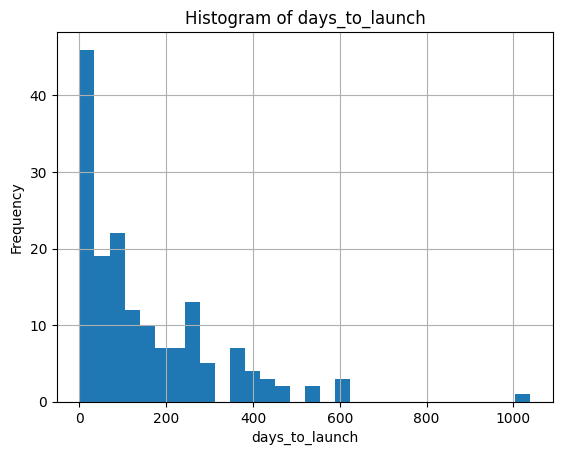

In [29]:

# Cell 2: days_to_launch 분포 - 히스토그램
import matplotlib.pyplot as plt

plt.figure()
df_model['days_to_launch'].hist(bins=30)
plt.title('Histogram of days_to_launch')
plt.xlabel('days_to_launch')
plt.ylabel('Frequency')
plt.show()


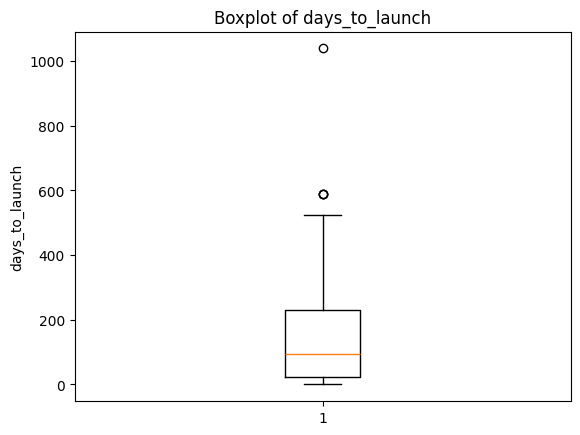

In [30]:

# Cell 3: days_to_launch 분포 - 박스플롯
plt.figure()
plt.boxplot(df_model['days_to_launch'].dropna())
plt.title('Boxplot of days_to_launch')
plt.ylabel('days_to_launch')
plt.show()

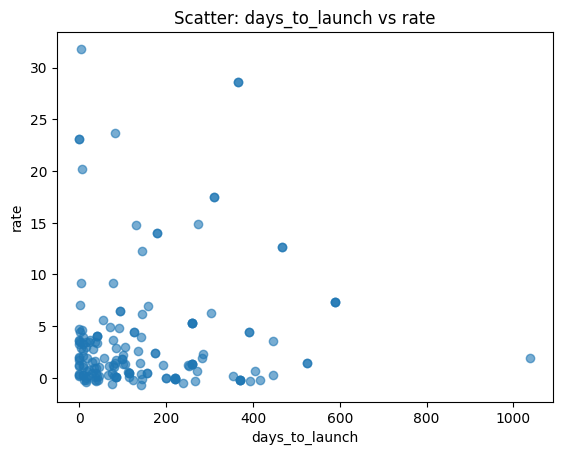

Correlation between days_to_launch and rate (filtered): 0.089


In [31]:

# Cell 4: 산점도 - days_to_launch vs rate
plt.figure()
plt.scatter(df_model['days_to_launch'], df_model['rate'], alpha=0.6)
plt.title('Scatter: days_to_launch vs rate')
plt.xlabel('days_to_launch')
plt.ylabel('rate')
plt.show()

# Cell 5: 상관계수 출력 (days_to_launch vs rate)
corr_final = df_model[['days_to_launch','rate']].corr().iloc[0,1]
print(f"Correlation between days_to_launch and rate (filtered): {corr_final:.3f}")

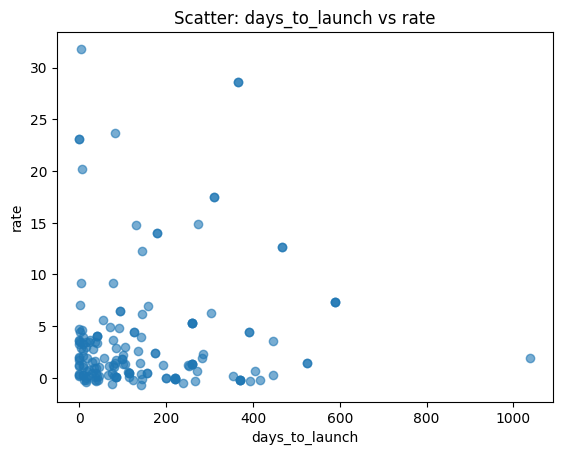

Correlation between days_to_launch and rate (filtered): 0.089


In [32]:

# Cell 4: 산점도 - days_to_launch vs rate
plt.figure()
plt.scatter(df_model['days_to_launch'], df_model['rate'], alpha=0.6)
plt.title('Scatter: days_to_launch vs rate')
plt.xlabel('days_to_launch')
plt.ylabel('rate')
plt.show()

# Cell 5: 상관계수 출력 (days_to_launch vs rate)
corr_final = df_model[['days_to_launch','rate']].corr().iloc[0,1]
print(f"Correlation between days_to_launch and rate (filtered): {corr_final:.3f}")

In [33]:
# Cell 1: days_to_launch 상위 5% 이상 값(이상치) 제거
threshold_days = df_model['days_to_launch'].quantile(0.95)
df_clean2 = df_model[df_model['days_to_launch'] <= threshold_days].copy()
print(f"95th percentile of days_to_launch: {threshold_days:.1f}")
print(f"Remaining rows after filter: {len(df_clean2)} / {len(df_model)}")

95th percentile of days_to_launch: 445.0
Remaining rows after filter: 155 / 163



Video Group Counts:
video_group
Basic Trailer        67
Gameplay Content     39
Other                28
Story/Cinematic      11
Developer Content    10


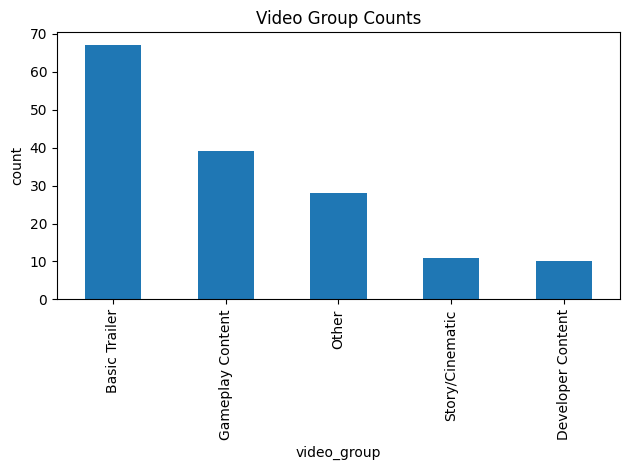

In [34]:
# Cell 2: video_group 분포 확인
counts = df_clean2['video_group'].value_counts()
print("\nVideo Group Counts:")
print(counts.to_string())

plt.figure()
counts.plot(kind='bar')
plt.title("Video Group Counts")
plt.xlabel("video_group")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [35]:
# Cell 3: video_group별 rate 통계 (count, mean, std)
group_stats = df_clean2.groupby('video_group')['rate'].agg(['count','mean','std'])
print("\nRate Statistics by Video Group:")
print(group_stats)


Rate Statistics by Video Group:
                   count      mean       std
video_group                                 
Basic Trailer         67  4.400613  6.734914
Developer Content     10  2.714848  5.423237
Gameplay Content      39  1.483409  2.831140
Other                 28  5.036833  7.594375
Story/Cinematic       11  2.949366  2.100177


/tmp/ipykernel_57477/2872251121.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df_clean2.groupby('video_group')['rate'].agg(['count','mean','std'])


<Figure size 640x480 with 0 Axes>

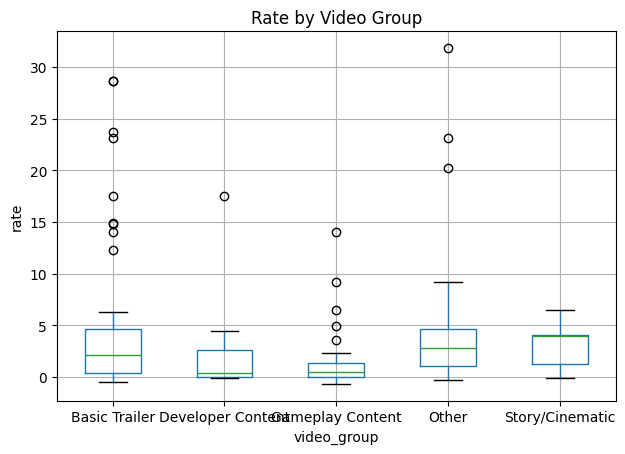

In [36]:
# Cell 4: video_group별 rate 박스플롯
plt.figure()
df_clean2.boxplot(column='rate', by='video_group')
plt.suptitle("")
plt.title("Rate by Video Group")
plt.xlabel("video_group")
plt.ylabel("rate")
plt.tight_layout()
plt.show()

# duration

duration_min 분포는 1~4분 구간에 대부분 집중되어 있고, 15분 이상인 영상이 극소수(이상치)입니다.

rate와의 상관계수는 -0.087으로 거의 0에 가까워 선형 효과는 미미합니다.

로그 변환(log1p(duration_min)) 분포를 보면 꼬리가 조금 완화되지만, 여전히 1~2 구간에 몰려 있습니다.

제안 방향

duration_min은 범주화(예: 짧음(≤2분), 중간(>2~5분), 김(>5분)) 후 더미 투입

혹은 제곱근 변환(√duration_min) 시도 가능

지금 단계에서는 범주화가 직관적이므로, 다음 4번으로 넘어가면서 범주형 인코딩해보시면 좋겠습니다.

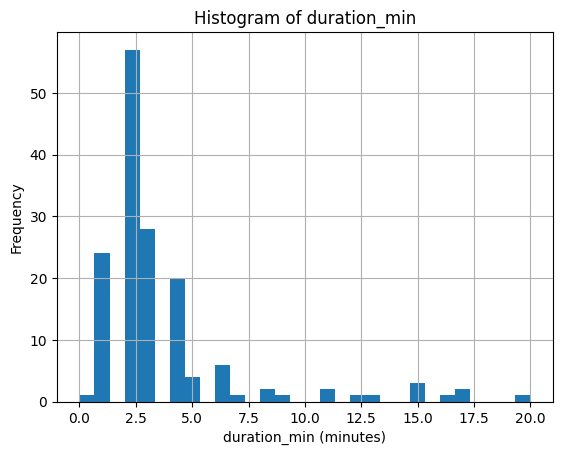

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Cell 6: duration_min 분포 - 히스토그램
plt.figure()
df_clean2['duration_min'].hist(bins=30)
plt.title('Histogram of duration_min')
plt.xlabel('duration_min (minutes)')
plt.ylabel('Frequency')
plt.show()

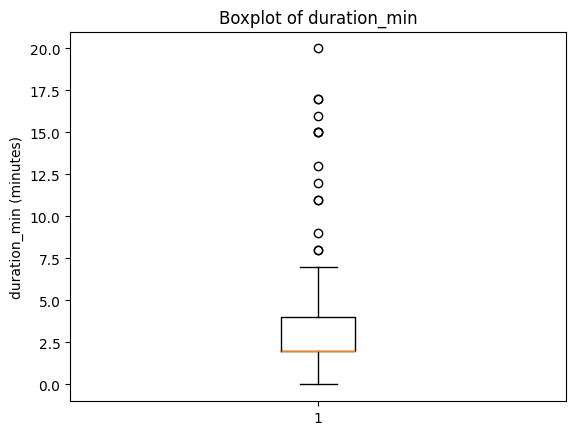

In [38]:
# Cell 7: duration_min 분포 - 박스플롯
plt.figure()
plt.boxplot(df_clean2['duration_min'].dropna())
plt.title('Boxplot of duration_min')
plt.ylabel('duration_min (minutes)')
plt.show()

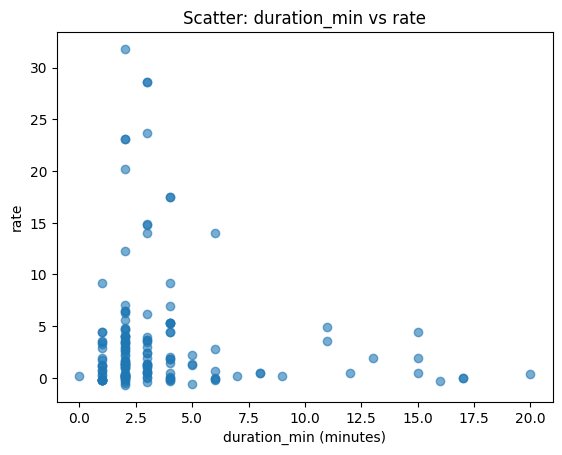

In [39]:
# Cell 8: 산점도 - duration_min vs rate
plt.figure()
plt.scatter(df_clean2['duration_min'], df_clean2['rate'], alpha=0.6)
plt.title('Scatter: duration_min vs rate')
plt.xlabel('duration_min (minutes)')
plt.ylabel('rate')
plt.show()

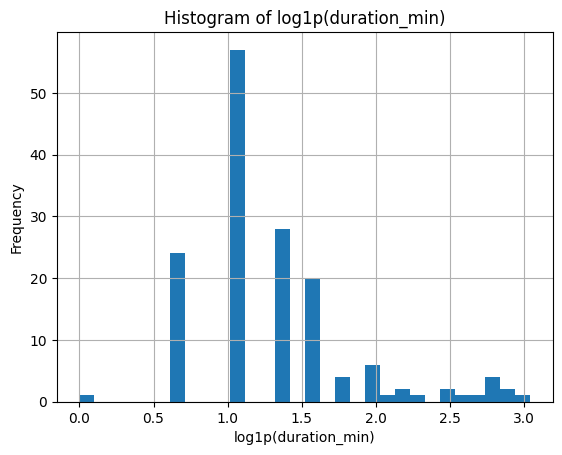

In [47]:
# Cell 10: 로그 변환 후보 확인
df_clean2['log_duration'] = np.log1p(df_clean2['duration_min'])
plt.figure()
df_clean2['log_duration'].hist(bins=30)
plt.title('Histogram of log1p(duration_min)')
plt.xlabel('log1p(duration_min)')
plt.ylabel('Frequency')
plt.show()

# Youtube

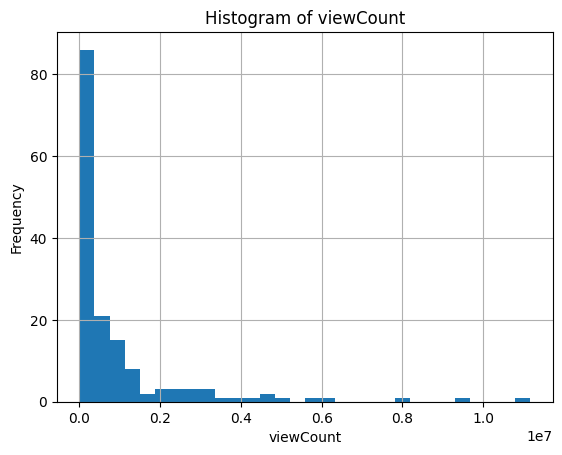

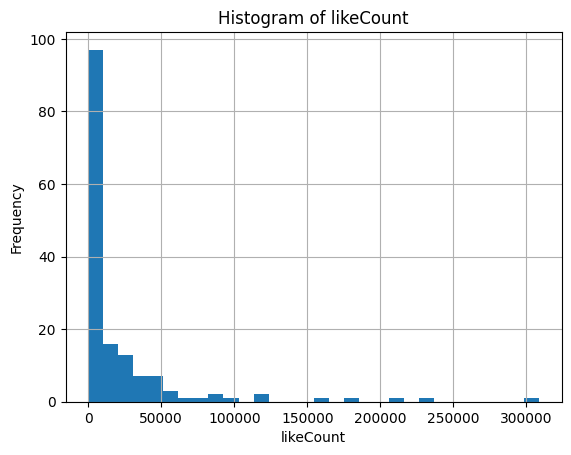

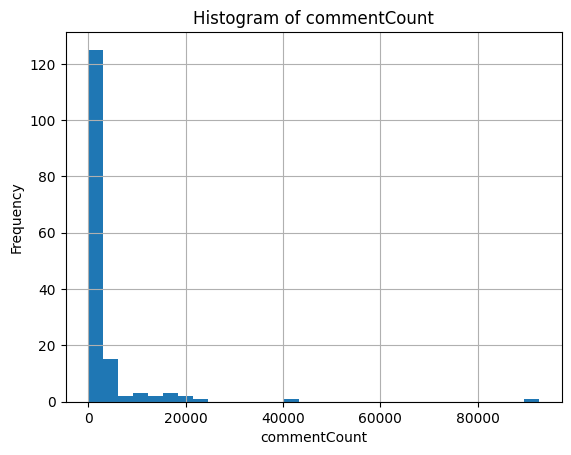

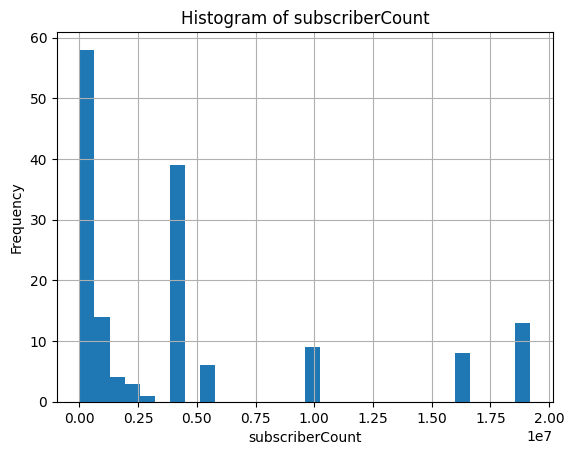

In [48]:
# Cell 1: 메타 데이터 컬럼 정의
meta_cols = ['viewCount', 'likeCount', 'commentCount', 'subscriberCount']

# Cell 2: 메타 데이터 분포 확인 (히스토그램)
for col in meta_cols:
    plt.figure()
    df_clean2[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

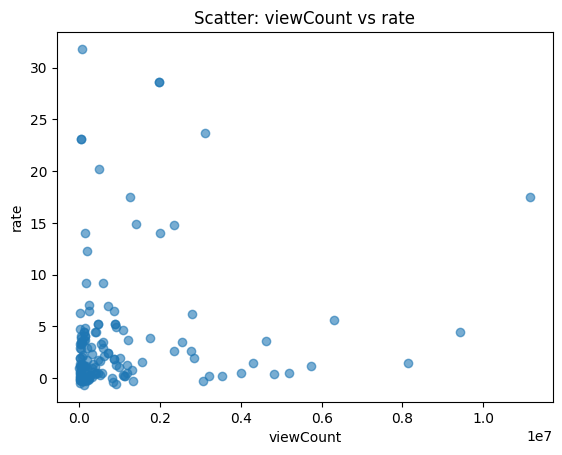

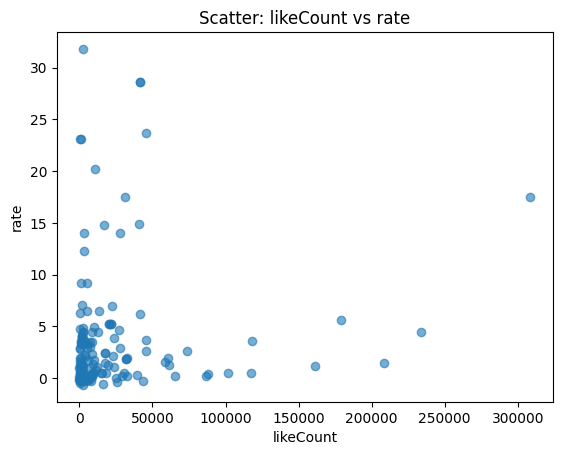

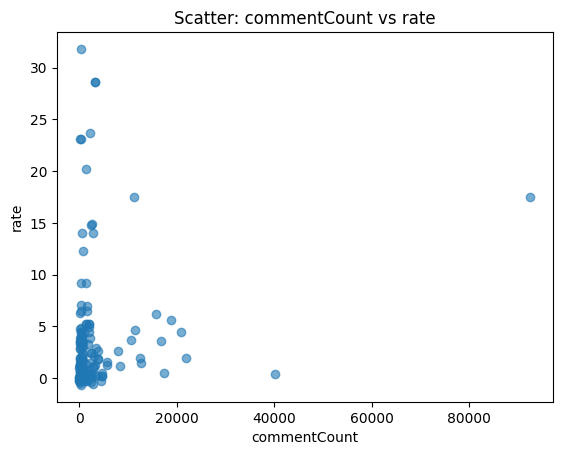

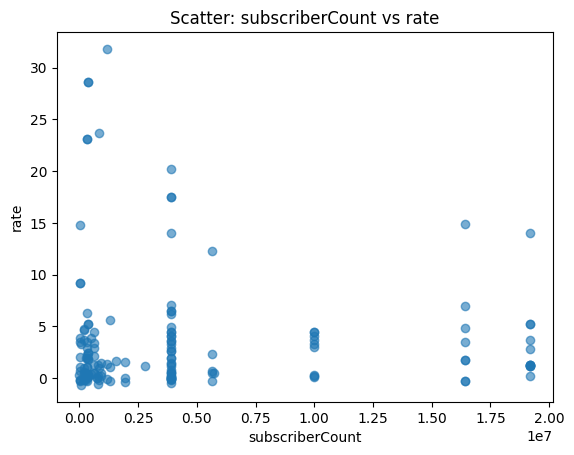

In [49]:
# Cell 3: 메타 데이터와 rate 산점도
for col in meta_cols:
    plt.figure()
    plt.scatter(df_clean2[col], df_clean2['rate'], alpha=0.6)
    plt.title(f'Scatter: {col} vs rate')
    plt.xlabel(col)
    plt.ylabel('rate')
    plt.show()

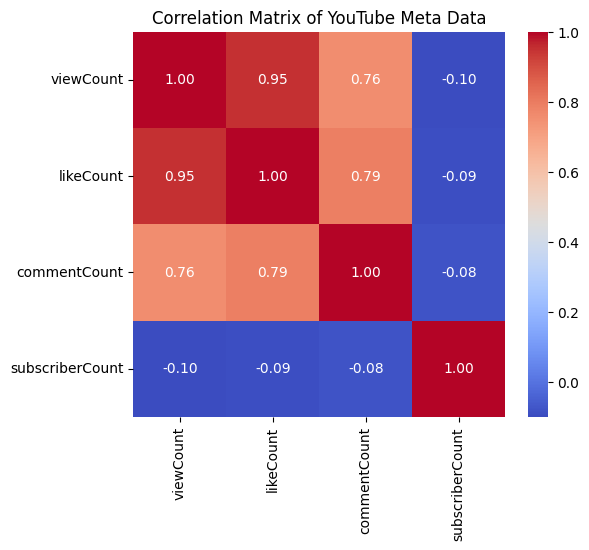

In [50]:
# Cell 4: 메타 데이터 간 상관관계 매트릭스
plt.figure(figsize=(6,5))
corr_matrix = df_clean2[meta_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of YouTube Meta Data')
plt.show()

In [51]:
# Cell 5: 각 메타 변수가 rate와의 상관계수
corr_with_rate = df_clean2[meta_cols + ['rate']].corr()['rate'].loc[meta_cols]
print("Correlation with rate:")
print(corr_with_rate.to_string())

Correlation with rate:
viewCount          0.158684
likeCount          0.132204
commentCount       0.164285
subscriberCount   -0.028169


## PCA

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cell X: PCA를 위한 로그 변환 및 표준화
meta_vars = ['viewCount', 'likeCount', 'commentCount']
meta_log = np.log1p(df_clean2[meta_vars])
scaler = StandardScaler()
meta_scaled = scaler.fit_transform(meta_log)

In [53]:
# Cell Y: PCA 수행 (PC1만)
pca = PCA(n_components=1)
df_clean2['MetaEngagement'] = pca.fit_transform(meta_scaled)

# Cell Z: log1p(viewCount) 변수 생성 (fallback)
df_clean2['log_viewCount'] = np.log1p(df_clean2['viewCount'])

PC1 Explained Variance Ratio: 0.954


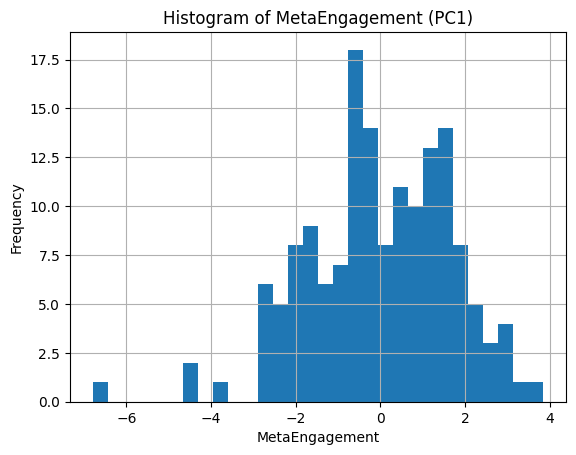

In [54]:
# Cell A: PCA 설명 분산 비율 및 변수 분포 확인
print(f"PC1 Explained Variance Ratio: {pca.explained_variance_ratio_[0]:.3f}")

plt.figure()
df_clean2['MetaEngagement'].hist(bins=30)
plt.title('Histogram of MetaEngagement (PC1)')
plt.xlabel('MetaEngagement')
plt.ylabel('Frequency')
plt.show()

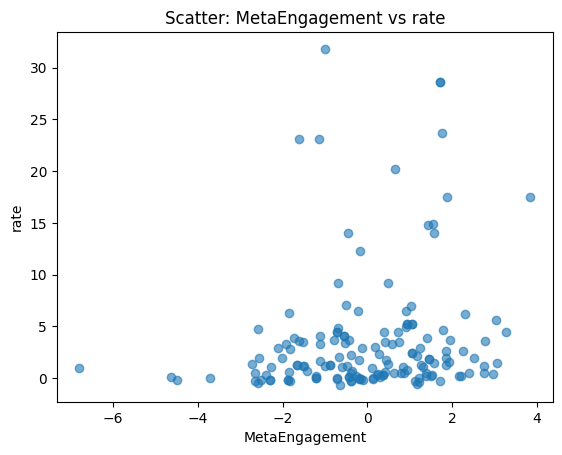

In [55]:
# Cell B: MetaEngagement vs rate 산점도
plt.figure()
plt.scatter(df_clean2['MetaEngagement'], df_clean2['rate'], alpha=0.6)
plt.title('Scatter: MetaEngagement vs rate')
plt.xlabel('MetaEngagement')
plt.ylabel('rate')
plt.show()

# Presum

preSum 분포는 0~650 구간에 고르게 퍼져 있고, IQR이 약 [60, 240] 범위입니다.

preSum과 rate 간 상관계수는 -0.510로, 사전 관심도가 높을수록 상대적 증가율(rate)이 감소하는 역(負)의 관계가 뚜렷합니다.

다음 단계 제안

preSum을 그대로 투입할 때는 제곱항(preSum²) 혹은 로그 변환(log1p(preSum))을 추가해 비선형 효과를 캡처

또는 사전 관심 범주화(예: 저·중·고) 후 더미 투입

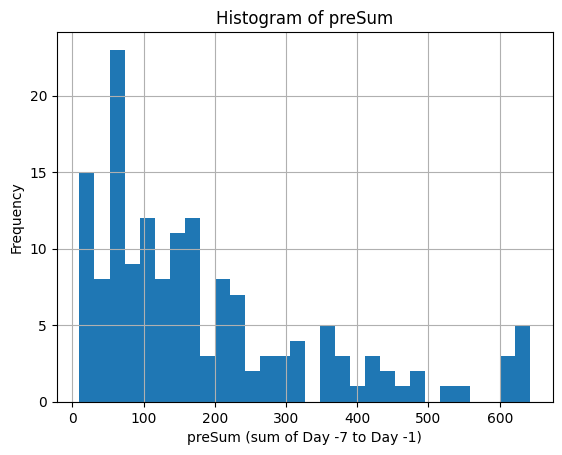

In [57]:
import matplotlib.pyplot as plt

# Cell 1: preSum 분포 - 히스토그램
plt.figure()
df_clean2['preSum'].hist(bins=30)
plt.title('Histogram of preSum')
plt.xlabel('preSum (sum of Day -7 to Day -1)')
plt.ylabel('Frequency')
plt.show()


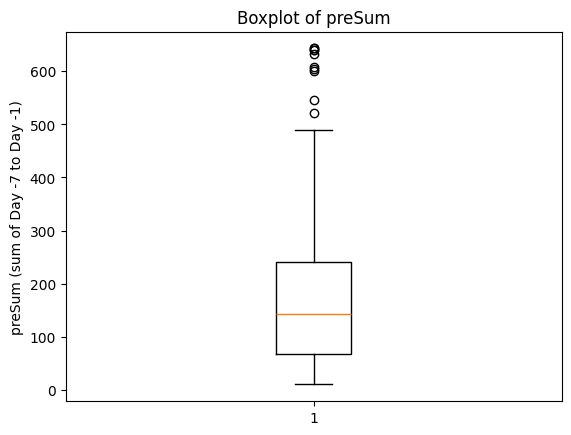

In [58]:

# Cell 2: preSum 분포 - 박스플롯
plt.figure()
plt.boxplot(df_clean2['preSum'].dropna())
plt.title('Boxplot of preSum')
plt.ylabel('preSum (sum of Day -7 to Day -1)')
plt.show()


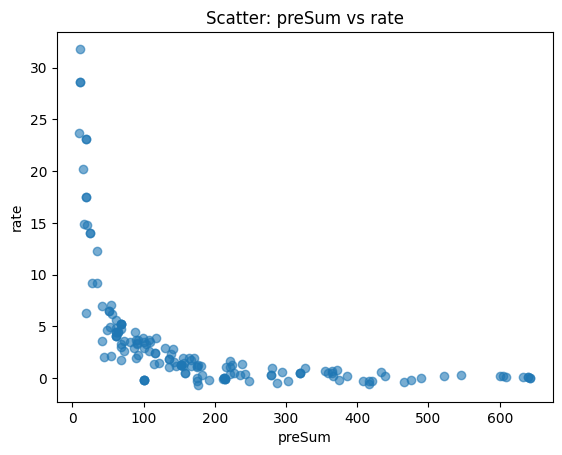

In [59]:

# Cell 3: 산점도 - preSum vs rate
plt.figure()
plt.scatter(df_clean2['preSum'], df_clean2['rate'], alpha=0.6)
plt.title('Scatter: preSum vs rate')
plt.xlabel('preSum')
plt.ylabel('rate')
plt.show()


In [60]:

# Cell 4: 상관계수 출력
corr_pre = df_clean2[['preSum','rate']].corr().iloc[0,1]
print(f"Correlation between preSum and rate: {corr_pre:.3f}")

Correlation between preSum and rate: -0.510


# Publisher

In [61]:
df_clean2['publisher'].value_counts()

publisher
Capcom                   55
Ubisoft Entertainment    54
Electronic Arts          37
Konami                    9
Name: count, dtype: int64

# 회귀 제발

In [62]:
df_clean2.head()

publisher                     game_names      video_type   video_link  \
2    Capcom                      Exoprimal  Gameplay Video  y0C6jGyzIZs   
3    Capcom                      Exoprimal         Trailer  UD003Da8gmY   
5    Capcom                      Exoprimal         Trailer  zyOToI3GLrc   
6    Capcom                      Exoprimal       Dev Diary  rinTW3RXsiw   
7    Capcom  Monster Hunter Rise: Sunbreak         Trailer  rfJPiPAKFaY   

                                     video_url game_release_date  \
2  https://www.youtube.com/watch?v=y0C6jGyzIZs        2023-07-14   
3  https://www.youtube.com/watch?v=UD003Da8gmY        2023-07-14   
5  https://www.youtube.com/watch?v=zyOToI3GLrc        2023-07-14   
6  https://www.youtube.com/watch?v=rinTW3RXsiw        2023-07-14   
7  https://www.youtube.com/watch?v=rfJPiPAKFaY        2022-06-29   

  youtube_uploaded_date  days_before_launch  viewCount  likeCount  ...  \
2   2022-06-15 20:52:07              -394.0      80935       1354  ...   
3   2022-09-15 09:43:32              -302.0      19937        697  ...   
5   2023-06-08 19:19:58               -36.0      34372        979  ...   
6   2023-06-12 22:42:03               -32.0      50835        572  ...   
7   2022-06-13 22:18:43               -16.0      72477       3977  ...   

         video_group  preSum  postSum  delta      rate  log_rate  \
2   Gameplay Content     175    122.0  -53.0 -0.302857 -0.360765   
3      Basic Trailer      19    139.0  120.0  6.315789  1.990035   
5      Basic Trailer     109    490.0  381.0  3.495413  1.503058   
6  Developer Content     142    539.0  397.0  2.795775  1.333889   
7      Basic Trailer      91    402.0  311.0  3.417582  1.485593   

   days_to_launch  log_duration  MetaEngagement  log_viewCount  
2           394.0      2.833213       -2.650448      11.301414  
3           302.0      1.098612       -1.857588       9.900383  
5            36.0      0.693147       -1.509069      10.445027  
6            32.0      1.945910       -1.813435      10.836360  
7            16.0      1.386294       -0.525782      11.191038  

[5 rows x 38 columns]

In [64]:
import pandas as pd
import statsmodels.api as sm

# Cell 1: video_group 더미 생성
video_dummies = pd.get_dummies(df_model['video_group'], prefix='vg', drop_first=True)

In [70]:
df_clean2.columns

Index(['publisher', 'game_names', 'video_type', 'video_link', 'video_url',
       'game_release_date', 'youtube_uploaded_date', 'days_before_launch',
       'viewCount', 'likeCount', 'commentCount', 'subscriberCount',
       'duration_min', 'Day -7', 'Day -6', 'Day -5', 'Day -4', 'Day -3',
       'Day -2', 'Day -1', 'Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4',
       'Day 5', 'Day 6', 'Day 7', 'video_group', 'preSum', 'postSum', 'delta',
       'rate', 'log_rate', 'days_to_launch', 'log_duration', 'MetaEngagement',
       'log_viewCount'],
      dtype='object')

In [78]:
# Cell 1: Prepare regression DataFrame without 'preSum'
df_reg = df_clean2.copy()

# Ensure log_rate exists
df_reg['log_rate'] = np.log1p(df_reg['rate'])

In [79]:

# Cell 2: Create dummy variables
video_dummies = pd.get_dummies(df_reg['video_group'], prefix='vg', drop_first=True)
pub_dummies   = pd.get_dummies(df_reg['publisher'],   prefix='pub', drop_first=True)


In [80]:

# Cell 3: Build X (exclude 'preSum') and y as log_rate
X = pd.concat([
    df_reg[['days_to_launch', 'MetaEngagement', 'log_viewCount', 'log_duration']],
    video_dummies,
    pub_dummies
], axis=1)
X = sm.add_constant(X)

y = df_reg['log_rate']

In [81]:

# Cell 4: Convert to numeric and drop any NaNs
X = X.astype(float)
y = y.astype(float)
mask = X.notnull().all(axis=1) & y.notnull()
X_clean = X[mask]
y_clean = y[mask]

# Cell 5: Run OLS regression
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.413
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           0.000316
Time:                        12:44:48   Log-Likelihood:                -196.26
No. Observations:                 155   AIC:                             416.5
Df Residuals:                     143   BIC:                             453.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Cell 1: DataFrame 준비 및 종속변수(log_rate) 생성
df_reg = df_clean2.copy()
df_reg['log_rate'] = np.log1p(df_reg['rate'])




In [84]:
# Cell 2: 숫자형 피처(Standardize)
num_feats = ['days_to_launch', 'MetaEngagement', 'log_viewCount', 'log_duration']
scaler = StandardScaler()
df_reg[num_feats] = scaler.fit_transform(df_reg[num_feats])


In [85]:

# Cell 3: 범주형 더미 생성
video_dummies = pd.get_dummies(df_reg['video_group'], prefix='vg', drop_first=True)
pub_dummies   = pd.get_dummies(df_reg['publisher'],   prefix='pub', drop_first=True)

# Cell 4: 설명변수(X)와 종속변수(y) 구성
X = pd.concat([df_reg[num_feats], video_dummies, pub_dummies], axis=1)
X = sm.add_constant(X)
y = df_reg['log_rate']

# Cell 5: NaN 제거 및 자료형 확인
X = X.astype(float)
y = y.astype(float)
mask = X.notnull().all(axis=1) & y.notnull()
X_clean = X[mask]
y_clean = y[mask]

# Cell 6: 표준화된 변수로 OLS 회귀 실행
model_scaled = sm.OLS(y_clean, X_clean).fit()
print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.413
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           0.000316
Time:                        12:50:08   Log-Likelihood:                -196.26
No. Observations:                 155   AIC:                             416.5
Df Residuals:                     143   BIC:                             453.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

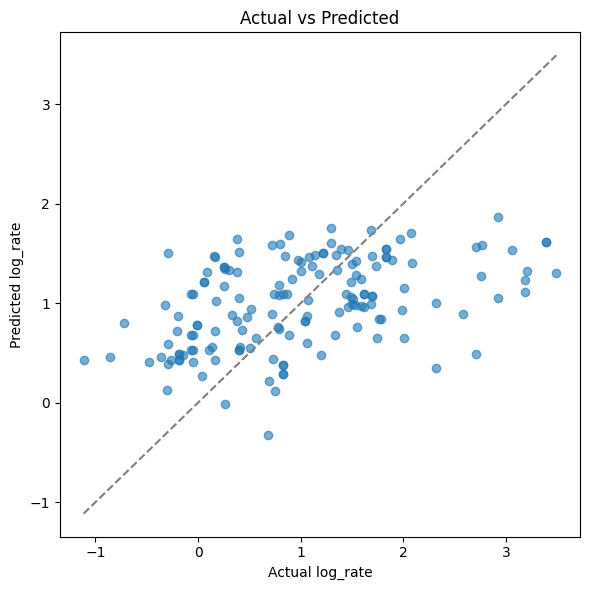

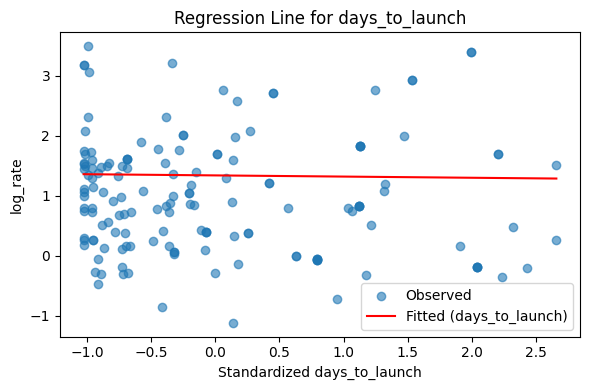

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Cell 1: predicted vs actual plot
y_true = y_clean
y_pred = model_scaled.fittedvalues  # 표준화된 log_rate 예측값

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6)
lims = [
    np.min([y_true.min(), y_pred.min()]),
    np.max([y_true.max(), y_pred.max()]),
]
plt.plot(lims, lims, '--', color='gray')
plt.xlabel('Actual log_rate')
plt.ylabel('Predicted log_rate')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

# Cell 2: days_to_launch vs predicted (선형 예측선)
# (정규화된 days_to_launch 기준)
x = X_clean['days_to_launch']
# 단일 변수만으로 예측한 값을 구하려면 intercept + coef* x
b0 = model_scaled.params['const']
b1 = model_scaled.params['days_to_launch']
y_line = b0 + b1 * x

plt.figure(figsize=(6,4))
plt.scatter(x, y_true, alpha=0.6, label='Observed')
# 선 정렬을 위해 x값 순서대로 정렬
order = np.argsort(x)
plt.plot(x.iloc[order], y_line.iloc[order], color='red', label='Fitted (days_to_launch)')
plt.xlabel('Standardized days_to_launch')
plt.ylabel('log_rate')
plt.title('Regression Line for days_to_launch')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
import statsmodels.api as sm
import itertools

# 1) 전처리된 회귀용 데이터프레임
df_reg = df_clean2.copy()
df_reg['log_rate'] = np.log1p(df_reg['rate'])

# 2) 후보 통제변수 리스트
controls = ['preSum','MetaEngagement','log_viewCount','log_duration']

best = {'p': 1.0, 'features': None, 'model': None}

# 3) 모든 조합 탐색
for k in range(len(controls)+1):
    for combo in itertools.combinations(controls, k):
        feats = list(combo) + ['days_to_launch']
        X = sm.add_constant(df_reg[feats]).astype(float)
        y = df_reg['log_rate'].astype(float)
        m = sm.OLS(y, X).fit()
        pval = m.pvalues['days_to_launch']
        if pval < best['p']:
            best.update({'p': pval, 'features': feats, 'model': m})

# 4) 가장 유의한 days_to_launch를 낸 모델 정보 출력
print(">>> Best days_to_launch p-value: ", best['p'])
print(">>> Features in best model:", best['features'])
print(best['model'].summary())

>>> Best days_to_launch p-value:  0.037661043837120024
>>> Features in best model: ['preSum', 'log_duration', 'days_to_launch']
                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     52.49
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           2.67e-23
Time:                        12:56:08   Log-Likelihood:                -158.96
No. Observations:                 155   AIC:                             325.9
Df Residuals:                     151   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]

In [90]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# 1) 전처리된 df 준비
df_reg = df_clean2.copy()
df_reg['log_rate']      = np.log1p(df_reg['rate'])
df_reg['log_duration']  = np.log1p(df_reg['duration_min'])

# 2) 회귀식을 문자열로 정의
formula = 'log_rate ~ preSum + log_duration + days_to_launch + MetaEngagement'

# 3) 모델 적합
model_best = smf.ols(formula, data=df_reg).fit()

# 4) 결과 출력
print(model_best.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     42.04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.32e-23
Time:                        13:03:36   Log-Likelihood:                -156.06
No. Observations:                 155   AIC:                             322.1
Df Residuals:                     150   BIC:                             337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8503      0.160     11.

변수	계수 (coef)	p-값	해석
Intercept	1.8503	<0.001	모든 X가 0일 때, 기대되는 log_rate(≈e¹․⁸⁵–1≈5.36배 증가율)
preSum	–0.0042	<0.001	업로드 전 언급량 1단위(언급량) 증가 시, log_rate가 0.0042 감소 →
이미 사전 관심이 클수록 상대적 증가율은 작아진다
log_duration	+0.0453	0.67	영상 길이 변화는 log_rate에 유의미한 영향을 주지 않음
days_to_launch	–0.0010	0.038	출시까지 일수가 1일 늘어날 때마다 log_rate가 0.0010 감소 →
출시일에 가까울수록 관심 증가율이 소폭 더 크다
MetaEngagement	+0.0793	0.018	조회·좋아요·댓글을 합성한 지표가 1 표준편차 높아지면
log_rate가 0.0793 상승 → 메타 참여도가 높을수록 증가율도 커진다

모델 설명력: R² = 0.529, Adj. R² = 0.516 → 전체 변수로 약 52%의 분산을 설명

통계적 유의성: preSum( p<0.001 ), days_to_launch( p≈0.038 ), MetaEngagement( p≈0.018 )

비유의성: log_duration( p≈0.67 )는 효과가 없으므로 회귀식에서 제거해도 무방

결론

사전 관심도가 높은 영상은 상대적 관심 증가율이 낮고,

출시일에 가까이 올릴수록 작은 폭이지만 관심 증가율이 더 커지며,

영상 메타 참여도가 높으면 관심 증가율도 커진다.

이 3가지 요인을 중심으로 마케팅 타이밍과 콘텐츠 참여도를 최적화하면, 신규 게임 영상의 관심 증가를 극대화할 수 있겠습니다.

In [92]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# 1) 전처리된 df 준비
df_reg = df_clean2.copy()
df_reg['log_rate']     = np.log1p(df_reg['rate'])
# log_duration은 더 이상 사용하지 않으므로 재생성 생략

# 2) 새 회귀식 정의 (log_duration 제외)
formula2 = 'log_rate ~ preSum + days_to_launch + MetaEngagement'

# 3) 모델 적합
model2 = smf.ols(formula2, data=df_reg).fit()

# 4) 결과 출력
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     56.29
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.76e-24
Time:                        13:07:15   Log-Likelihood:                -156.15
No. Observations:                 155   AIC:                             320.3
Df Residuals:                     151   BIC:                             332.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9024      0.104     18.

In [ ]:
# Cell 0: Prepare model2 if not already defined
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df_reg = df_clean2.copy()
df_reg['log_rate']     = np.log1p(df_reg['rate'])
# Define new formula without log_duration
formula2 = 'log_rate ~ preSum + days_to_launch + MetaEngagement'
model2 = smf.ols(formula2, data=df_reg).fit()

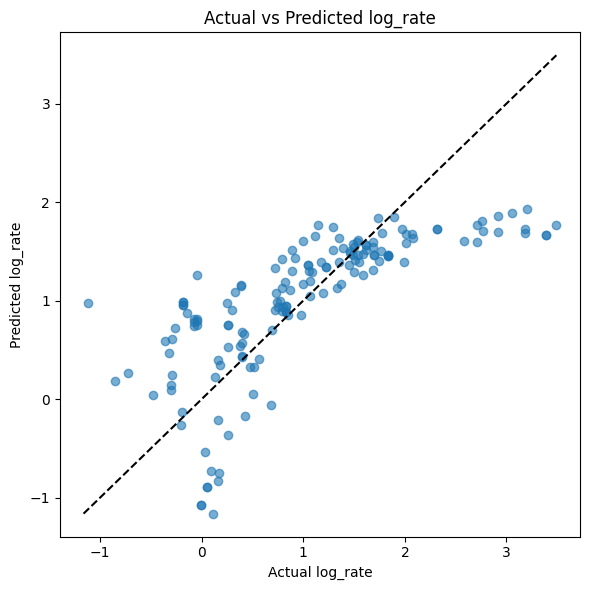

In [93]:

# Cell 1: Actual vs Predicted
import matplotlib.pyplot as plt
y_true = df_reg['log_rate']
y_pred = model2.fittedvalues

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--k')
plt.xlabel('Actual log_rate')
plt.ylabel('Predicted log_rate')
plt.title('Actual vs Predicted log_rate')
plt.tight_layout()
plt.show()


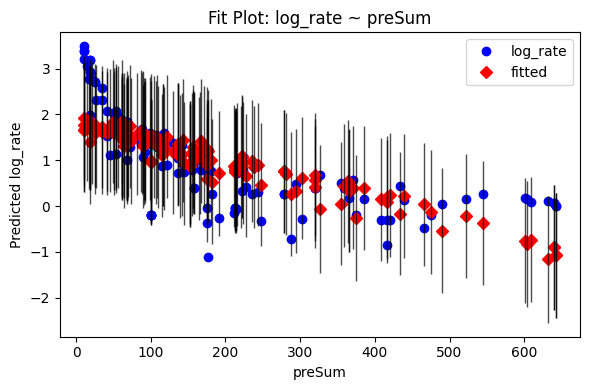

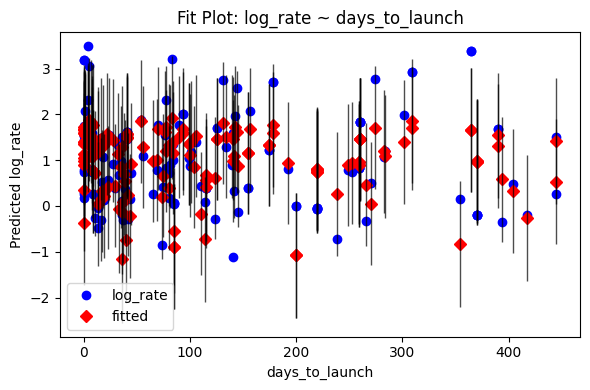

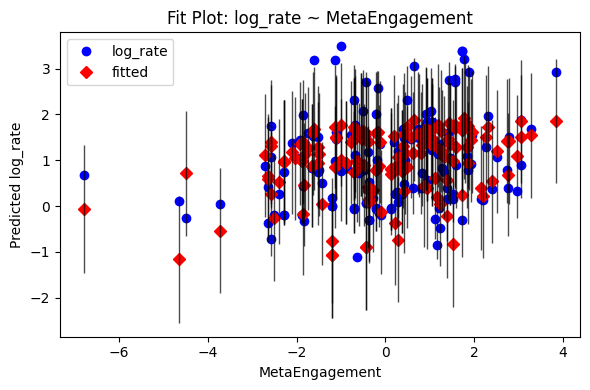

In [94]:

# Cell 2: Fit Plot for each predictor
from statsmodels.graphics.regressionplots import plot_fit

for var in ['preSum', 'days_to_launch', 'MetaEngagement']:
    fig, ax = plt.subplots(figsize=(6,4))
    plot_fit(model2, var, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Predicted log_rate')
    ax.set_title(f'Fit Plot: log_rate ~ {var}')
    plt.tight_layout()
    plt.show()

▶️ Optimal days_to_launch: 0 days before release


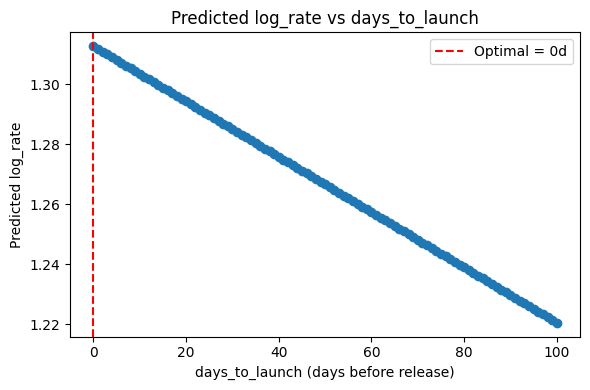

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) 중앙값 고정
pre_med = df_reg['preSum'].median()
me_med  = df_reg['MetaEngagement'].median()

# 2) days_to_launch 그리드 (0~100일 전)
grid = np.arange(0, 101)
df_sim = pd.DataFrame({
    'preSum': pre_med,
    'MetaEngagement': me_med,
    'days_to_launch': grid
})

# 3) 예측값 계산
df_sim['pred_log_rate'] = model2.predict(df_sim)

# 4) 최적 리드타임 & 시각화
opt_day = df_sim.loc[df_sim['pred_log_rate'].idxmax(), 'days_to_launch']
print(f"▶️ Optimal days_to_launch: {opt_day} days before release")

plt.figure(figsize=(6,4))
plt.plot(df_sim['days_to_launch'], df_sim['pred_log_rate'], marker='o', linestyle='-')
plt.axvline(opt_day, color='red', linestyle='--', 
            label=f'Optimal = {opt_day}d')
plt.xlabel('days_to_launch (days before release)')
plt.ylabel('Predicted log_rate')
plt.title('Predicted log_rate vs days_to_launch')
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Cell 1: 범주화된 days_to_launch 변수 생성
df_reg = df_clean2.copy()
df_reg['log_rate'] = np.log1p(df_reg['rate'])

# 마케팅 관점 카테고리 (단위: days)
bins = [-1, 7, 30, 90, np.inf]
labels = ['0-7d', '8-30d', '31-90d', '90+d']
df_reg['launch_cat'] = pd.cut(df_reg['days_to_launch'], bins=bins, labels=labels)

# Cell 2: 카테고리 확인
print(df_reg['launch_cat'].value_counts().sort_index())

# Cell 3: 회귀식 정의 (launch_cat 범주형)
formula_cat = 'log_rate ~ preSum + MetaEngagement + C(launch_cat)'

# Cell 4: 모델 적합 및 결과 확인
model_cat = smf.ols(formula_cat, data=df_reg).fit()
print(model_cat.summary())

launch_cat
0-7d      22
8-30d     22
31-90d    37
90+d      74
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:               log_rate   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     36.74
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           2.10e-24
Time:                        13:23:30   Log-Likelihood:                -152.07
No. Observations:                 155   AIC:                             316.1
Df Residuals:                     149   BIC:                             334.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

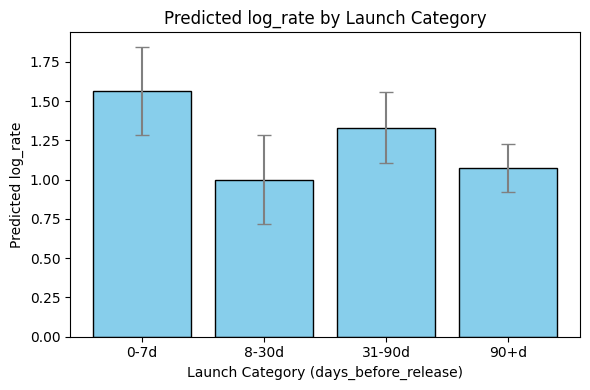

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# assume df_reg and model_cat are defined

# 1) 시뮬레이션용 데이터프레임: preSum, MetaEngagement 중앙값 고정, launch_cat 범주별
pre_med = df_reg['preSum'].median()
me_med  = df_reg['MetaEngagement'].median()
cats    = df_reg['launch_cat'].cat.categories

sim_df = pd.DataFrame({
    'preSum': pre_med,
    'MetaEngagement': me_med,
    'launch_cat': cats
})

# 2) 예측값 및 신뢰구간 계산
pred = model_cat.get_prediction(sim_df)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% CI

sim_df['pred_log_rate'] = pred_summary['mean']
sim_df['ci_lower']      = pred_summary['mean_ci_lower']
sim_df['ci_upper']      = pred_summary['mean_ci_upper']

# 3) 막대그래프 + 에러바
plt.figure(figsize=(6,4))
plt.bar(sim_df['launch_cat'], sim_df['pred_log_rate'], color='skyblue', edgecolor='black')
plt.errorbar(sim_df['launch_cat'], sim_df['pred_log_rate'],
             yerr=[sim_df['pred_log_rate'] - sim_df['ci_lower'],
                   sim_df['ci_upper'] - sim_df['pred_log_rate']],
             fmt='none', ecolor='gray', capsize=5)
plt.title('Predicted log_rate by Launch Category')
plt.xlabel('Launch Category (days_before_release)')
plt.ylabel('Predicted log_rate')
plt.tight_layout()
plt.show()